# Generate Explainable Report with German Credit Risk dataset using XAI
This notebook demonstrates how to generate explanations report using complier implemented in the XAI library.

In XAI project, our simply vision is to:
1. __Speed up data validation__
2. __Simplify model engineering__
3. __Build trust__  
  
For more details, please refer to our [whitepaper](https://sap.sharepoint.com/sites/100454/ML_Apps/Shared%20Documents/Reusable%20Components/Explainability/XAI_Whitepaper.pdf?csf=1&e=phIUNN&cid=771297d7-d488-441a-8a65-dab0305c3f04)

This tutorial is inspire from [Predicting Credit Risk - Model Pipeline](https://www.kaggle.com/kabure/predicting-credit-risk-model-pipeline)


## Context
The original dataset contains 1000 entries with 20 categorial/symbolic attributes prepared by Prof. Hofmann. In this dataset, each entry represents a person who takes a credit by a bank. Each person is classified as good or bad credit risks according to the set of attributes. The link to the original dataset can be found below.


## Content
It is almost impossible to understand the original dataset due to its complicated system of categories and symbols. Thus, I wrote a small Python script to convert it into a readable CSV file. Several columns are simply ignored, because in my opinion either they are not important or their descriptions are obscure. The selected attributes are:

* Age (numeric)
* Sex (text: male, female)
* Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
* Housing (text: own, rent, or free)
* Saving accounts (text - little, moderate, quite rich, rich)
* Checking account (numeric, in DM - Deutsch Mark)
* Credit amount (numeric, in DM)
* Duration (numeric, in month)
* Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)
* Risk (Value target - Good or Bad Risk)



## Acknowledgements
Source: [UCI](https://archive.ics.uci.edu/ml/datasets/Statlog+%28German+Credit+Data%29)

### Citation Request:
Please refer to the Machine Learning Repository's [citation policy](https://archive.ics.uci.edu/ml/citation_policy.html)


## Steps
1. Create a model to Predict "Good" or "Bad" risk transactions, using the data provide in [german credit risk](https://www.kaggle.com/uciml/german-credit)
2. Evaluate the model performance with XAI report

## Notes
This notebook require additional libs, check-on the `requirements.txt`

***


# 1. Understanding our data

* Looking the Type of Data
* Null Numbers
* Unique values
* The first rows of our dataset

In [1]:
#Load the librarys
import pandas as pd #To work with dataset
import numpy as np #Math library
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn
import warnings #ignore warnings
warnings.filterwarnings("ignore")

import zipfile
with zipfile.ZipFile('german-credit.zip', 'r') as zip_ref:
    zip_ref.extractall('./')

#Importing the data
df = pd.read_csv("german_credit_data.csv", index_col=0)
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [2]:
df.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [3]:
#Searching for Missings,type of data and also known the shape of data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     817 non-null object
Checking account    606 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
Risk                1000 non-null object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB
None


In [4]:
#Looking unique values
print(df.nunique())
#Looking the data
print(df.head())

Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
Risk                  2
dtype: int64
   Age     Sex  Job Housing Saving accounts Checking account  Credit amount  \
0   67    male    2     own             NaN           little           1169   
1   22  female    2     own          little         moderate           5951   
2   49    male    1     own          little              NaN           2096   
3   45    male    2    free          little           little           7882   
4   53    male    2    free          little           little           4870   

   Duration              Purpose  Risk  
0         6             radio/TV  good  
1        48             radio/TV   bad  
2        12            education  good  
3        42  furniture/equipment  good  
4        24                  car   bad  


***


# 2. Data explorations:
* Starting by distribuition of column Age.
* Some Seaborn graphical
* Columns crossing

## 2.1 Check target variable and their distribuition

### 2.1.1 Target variable distribution

In [5]:
# it's a library that we work with plotly
import plotly.offline as py 
py.init_notebook_mode(connected=True) # this code, allow us to work with offline plotly version
import plotly.graph_objs as go # it's like "plt" of matplot
import plotly.tools as tls # It's useful to we get some tools of plotly
from collections import Counter # To do counter of some features

trace0 = go.Bar(
            x = df[df["Risk"]== 'good']["Risk"].value_counts().index.values,
            y = df[df["Risk"]== 'good']["Risk"].value_counts().values,
            name='Good credit'
    )

trace1 = go.Bar(
            x = df[df["Risk"]== 'bad']["Risk"].value_counts().index.values,
            y = df[df["Risk"]== 'bad']["Risk"].value_counts().values,
            name='Bad credit'
    )

data = [trace0, trace1]

layout = go.Layout(
    
)

layout = go.Layout(
    yaxis=dict(
        title='Count'
    ),
    xaxis=dict(
        title='Risk Variable'
    ),
    title='Target variable distribution'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='grouped-bar')

### 2.1.2 Age distribution

In [6]:
df_good = df.loc[df["Risk"] == 'good']['Age'].values.tolist()
df_bad = df.loc[df["Risk"] == 'bad']['Age'].values.tolist()
df_age = df['Age'].values.tolist()

#First plot
trace0 = go.Histogram(
    x=df_good,
    histnorm='probability',
    name="Good Credit"
)
#Second plot
trace1 = go.Histogram(
    x=df_bad,
    histnorm='probability',
    name="Bad Credit"
)
#Third plot
trace2 = go.Histogram(
    x=df_age,
    histnorm='probability',
    name="Overall Age"
)

#Creating the grid
fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Good','Bad', 'General Distribuition'))

#setting the figs
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(showlegend=True, title='Age Distribuition', bargap=0.05)
py.iplot(fig, filename='custom-sized-subplot-with-subplot-titles')

/Users/i062308/anaconda3/envs/german-credit-py37/lib/python3.7/site-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



### 2.1.3 Age vs Risk

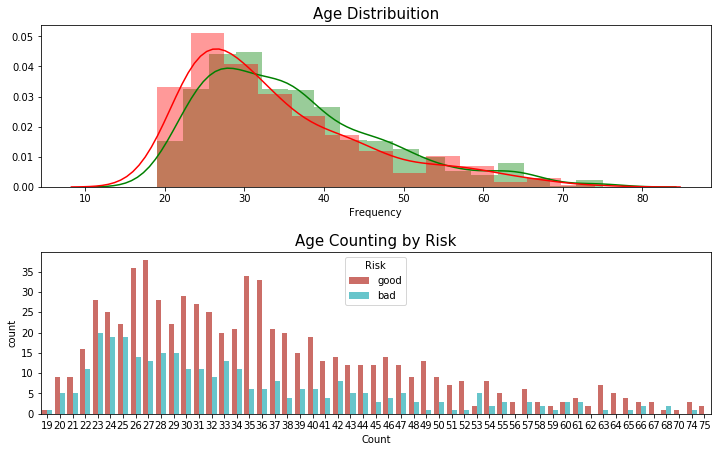

In [7]:
df_good = df[df["Risk"] == 'good']
df_bad = df[df["Risk"] == 'bad']

fig, ax = plt.subplots(nrows=2, figsize=(12,8))
plt.subplots_adjust(hspace = 0.4, top = 0.8)

g1 = sns.distplot(df_good["Age"], ax=ax[0], 
             color="g")
g1 = sns.distplot(df_bad["Age"], ax=ax[0], 
             color='r')
g1.set_title("Age Distribuition", fontsize=15)
g1.set_xlabel("Age")
g1.set_xlabel("Frequency")

g2 = sns.countplot(x="Age",data=df, palette="hls", 
                   ax=ax[1], hue = "Risk")
g2.set_title("Age Counting by Risk", fontsize=15)
g2.set_xlabel("Age")
g2.set_xlabel("Count")
plt.show()

## 2.2 Risk vs Age range
* 18-25 = Student
* 26-35 = Young
* 36-60 = Adult
* 61-120 = Senior

In [8]:
#Let's look the Credit Amount column
interval = (18, 25, 35, 60, 120)

cats = ['Student', 'Young', 'Adult', 'Senior']
df["Age Bucket"] = pd.cut(df.Age, interval, labels=cats)

df_good = df[df["Risk"] == 'good']
df_bad = df[df["Risk"] == 'bad']

print(df.groupby("Age Bucket").count())

            Age  Sex  Job  Housing  Saving accounts  Checking account  \
Age Bucket                                                              
Student     190  190  190      190              162               140   
Young       398  398  398      398              340               228   
Adult       367  367  367      367              280               210   
Senior       45   45   45       45               35                28   

            Credit amount  Duration  Purpose  Risk  
Age Bucket                                          
Student               190       190      190   190  
Young                 398       398      398   398  
Adult                 367       367      367   367  
Senior                 45        45       45    45  


In [9]:
trace0 = go.Box(
    y=df_good["Credit amount"],
    x=df_good["Age Bucket"],
    name='Good credit',
    marker=dict(
        color='#3D9970'
    )
)

trace1 = go.Box(
    y=df_bad['Credit amount'],
    x=df_bad['Age Bucket'],
    name='Bad credit',
    marker=dict(
        color='#FF4136'
    )
)
    
data = [trace0, trace1]

layout = go.Layout(
    yaxis=dict(
        title='Credit Amount (US Dollar)',
        zeroline=False
    ),
    xaxis=dict(
        title='Age Categorical'
    ),
    boxmode='group'
)
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='box-age-cat')

## 2.3 Risk vs Housing (Rent/Owned/Free)
we can see that the own and good risk have a high correlation

In [10]:
#First plot
trace0 = go.Bar(
    x = df[df["Risk"]== 'good']["Housing"].value_counts().index.values,
    y = df[df["Risk"]== 'good']["Housing"].value_counts().values,
    name='Good credit'
)

#Second plot
trace1 = go.Bar(
    x = df[df["Risk"]== 'bad']["Housing"].value_counts().index.values,
    y = df[df["Risk"]== 'bad']["Housing"].value_counts().values,
    name="Bad Credit"
)

data = [trace0, trace1]
layout = go.Layout(
    title='Housing Distribuition'
)


fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='Housing-Grouped')

#### Distribution of Credit Amount by Housing
Highest values come from category "free" and we have a different distribuition by Risk

In [11]:
fig = {
    "data": [
        {
            "type": 'violin',
            "x": df_good['Housing'],
            "y": df_good['Credit amount'],
            "legendgroup": 'Good Credit',
            "scalegroup": 'No',
            "name": 'Good Credit',
            "side": 'negative',
            "box": {
                "visible": True
            },
            "meanline": {
                "visible": True
            },
            "line": {
                "color": 'blue'
            }
        },
        {
            "type": 'violin',
            "x": df_bad['Housing'],
            "y": df_bad['Credit amount'],
            "legendgroup": 'Bad Credit',
            "scalegroup": 'No',
            "name": 'Bad Credit',
            "side": 'positive',
            "box": {
                "visible": True
            },
            "meanline": {
                "visible": True
            },
            "line": {
                "color": 'green'
            }
        }
    ],
    "layout" : {
        "yaxis": {
            "zeroline": False,
        },
        "violingap": 0,
        "violinmode": "overlay"
    }
}

py.iplot(fig, filename = 'violin/split', validate = False)

## 2.4 Risk vs Gender

In [12]:
#First plot
trace0 = go.Bar(
    x = df[df["Risk"]== 'good']["Sex"].value_counts().index.values,
    y = df[df["Risk"]== 'good']["Sex"].value_counts().values,
    name='Good credit'
)

#First plot 2
trace1 = go.Bar(
    x = df[df["Risk"]== 'bad']["Sex"].value_counts().index.values,
    y = df[df["Risk"]== 'bad']["Sex"].value_counts().values,
    name="Bad Credit"
)

#Second plot
trace2 = go.Box(
    x = df[df["Risk"]== 'good']["Sex"],
    y = df[df["Risk"]== 'good']["Credit amount"],
    name=trace0.name
)

#Second plot 2
trace3 = go.Box(
    x = df[df["Risk"]== 'bad']["Sex"],
    y = df[df["Risk"]== 'bad']["Credit amount"],
    name=trace1.name
)

data = [trace0, trace1, trace2,trace3]
fig = tls.make_subplots(rows=1, cols=2, 
                        subplot_titles=('Gender Count', 'Credit Amount by Gender'))

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 1, 2)

fig['layout'].update(height=400, width=800, title='Gender Distribuition', boxmode='group')
py.iplot(fig, filename='sex-subplot')

## 2.5 Risk vs Job
* Distribuition
* Crossed by Credit amount
* Crossed by Age

__Job index__:
 * 0 - unskilled and non-resident
 * 1 - unskilled and resident
 * 2 - skilled
 * 3 - highly skilled

In [13]:
#First plot
trace0 = go.Bar(
    x = df[df["Risk"]== 'good']["Job"].value_counts().index.values,
    y = df[df["Risk"]== 'good']["Job"].value_counts().values,
    name='Good credit Distribuition'
)

#Second plot
trace1 = go.Bar(
    x = df[df["Risk"]== 'bad']["Job"].value_counts().index.values,
    y = df[df["Risk"]== 'bad']["Job"].value_counts().values,
    name="Bad Credit Distribuition"
)

data = [trace0, trace1]

layout = go.Layout(
    title='Job Distribuition'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bar')

In [14]:
trace0 = go.Box(
    x=df_good["Job"],
    y=df_good["Credit amount"],
    name='Good credit'
)

trace1 = go.Box(
    x=df_bad['Job'],
    y=df_bad['Credit amount'],
    name='Bad credit'
)
    
data = [trace0, trace1]

layout = go.Layout(
    yaxis=dict(
        title='Credit Amount distribuition by Job'
    ),
    boxmode='group'
)
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='box-age-cat')

In [15]:
fig = {
    "data": [
        {
            "type": 'violin',
            "x": df_good['Job'],
            "y": df_good['Age'],
            "legendgroup": 'Good Credit',
            "scalegroup": 'No',
            "name": 'Good Credit',
            "side": 'negative',
            "box": {
                "visible": True
            },
            "meanline": {
                "visible": True
            },
            "line": {
                "color": 'blue'
            }
        },
        {
            "type": 'violin',
            "x": df_bad['Job'],
            "y": df_bad['Age'],
            "legendgroup": 'Bad Credit',
            "scalegroup": 'No',
            "name": 'Bad Credit',
            "side": 'positive',
            "box": {
                "visible": True
            },
            "meanline": {
                "visible": True
            },
            "line": {
                "color": 'green'
            }
        }
    ],
    "layout" : {
        "yaxis": {
            "zeroline": False,
        },
        "violingap": 0,
        "violinmode": "overlay"
    }
}


py.iplot(fig, filename = 'Age-Housing', validate = False)

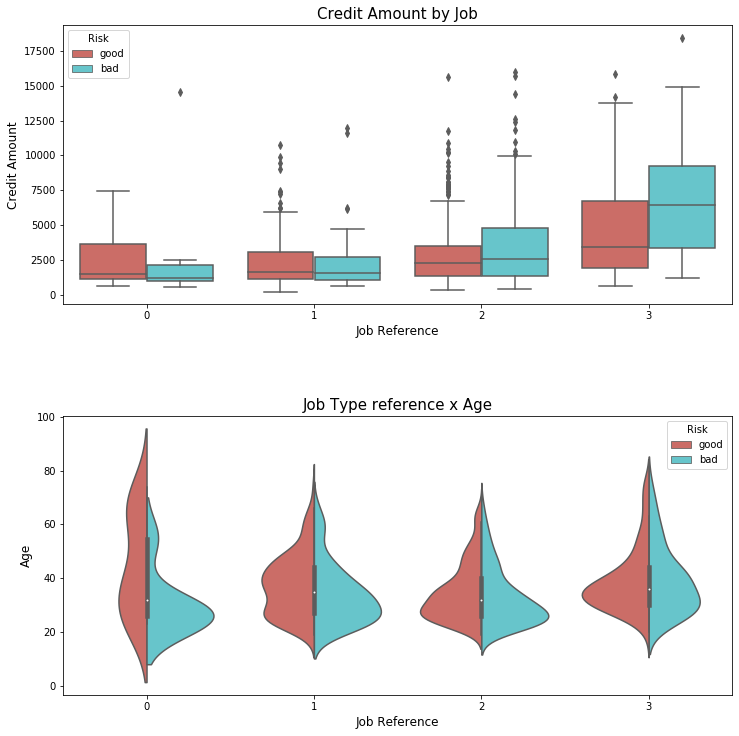

In [16]:
fig, ax = plt.subplots(figsize=(12,12), nrows=2)

g1 = sns.boxplot(x="Job", y="Credit amount", data=df, 
            palette="hls", ax=ax[0], hue="Risk")
g1.set_title("Credit Amount by Job", fontsize=15)
g1.set_xlabel("Job Reference", fontsize=12)
g1.set_ylabel("Credit Amount", fontsize=12)

g2 = sns.violinplot(x="Job", y="Age", data=df, ax=ax[1],  
               hue="Risk", split=True, palette="hls")
g2.set_title("Job Type reference x Age", fontsize=15)
g2.set_xlabel("Job Reference", fontsize=12)
g2.set_ylabel("Age", fontsize=12)

plt.subplots_adjust(hspace = 0.4,top = 0.9)

plt.show()


Looking the distribuition of Credit Amont

In [17]:
import plotly.figure_factory as ff
import numpy as np

# Add histogram data
x1 = np.log(df_good['Credit amount']) 
x2 = np.log(df_bad["Credit amount"])

# Group data together
hist_data = [x1, x2]

group_labels = ['Good Credit', 'Bad Credit']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=.2)

# Plot!
py.iplot(fig, filename='Distplot with Multiple Datasets')

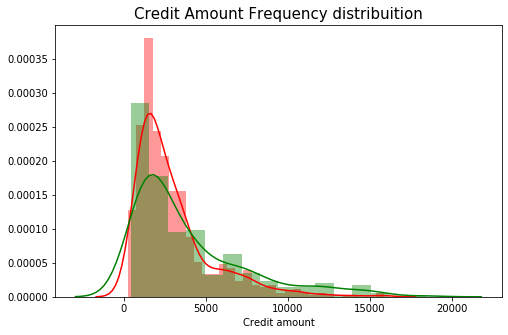

In [18]:
#Ploting the good and bad dataframes in distplot
plt.figure(figsize = (8,5))

g= sns.distplot(df_good['Credit amount'], color='r')
g = sns.distplot(df_bad["Credit amount"], color='g')
g.set_title("Credit Amount Frequency distribuition", fontsize=15)
plt.show()

Distruibution of Saving accounts by Risk

In [19]:
from plotly import tools
import numpy as np
import plotly.graph_objs as go

count_good = go.Bar(
    x = df_good["Saving accounts"].value_counts().index.values,
    y = df_good["Saving accounts"].value_counts().values,
    name='Good credit'
)
count_bad = go.Bar(
    x = df_bad["Saving accounts"].value_counts().index.values,
    y = df_bad["Saving accounts"].value_counts().values,
    name='Bad credit'
)


box_1 = go.Box(
    x=df_good["Saving accounts"],
    y=df_good["Credit amount"],
    name='Good credit'
)
box_2 = go.Box(
    x=df_bad["Saving accounts"],
    y=df_bad["Credit amount"],
    name='Bad credit'
)

scat_1 = go.Box(
    x=df_good["Saving accounts"],
    y=df_good["Age"],
    name='Good credit'
)
scat_2 = go.Box(
    x=df_bad["Saving accounts"],
    y=df_bad["Age"],
    name='Bad credit'
)

data = [scat_1, scat_2, box_1, box_2, count_good, count_bad]

fig = tools.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Count Saving Accounts','Credit Amount by Savings Acc', 
                                          'Age by Saving accounts'))

fig.append_trace(count_good, 1, 1)
fig.append_trace(count_bad, 1, 1)

fig.append_trace(box_2, 1, 2)
fig.append_trace(box_1, 1, 2)

fig.append_trace(scat_1, 2, 1)
fig.append_trace(scat_2, 2, 1)



fig['layout'].update(height=700, width=800, title='Saving Accounts Exploration', boxmode='group')

py.iplot(fig, filename='combined-savings')

/Users/i062308/anaconda3/envs/german-credit-py37/lib/python3.7/site-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



## 2.6 Risk vs Purposes

__Purposes__:
* car
* furniture/equipment
* radio/TV
* domestic appliances
* repairs
* education
* business
* vacation/others

Values describe: 
Risk                 bad  good
Purpose                       
business              34    63
car                  106   231
domestic appliances    4     8
education             23    36
furniture/equipment   58   123
radio/TV              62   218
repairs                8    14
vacation/others        5     7


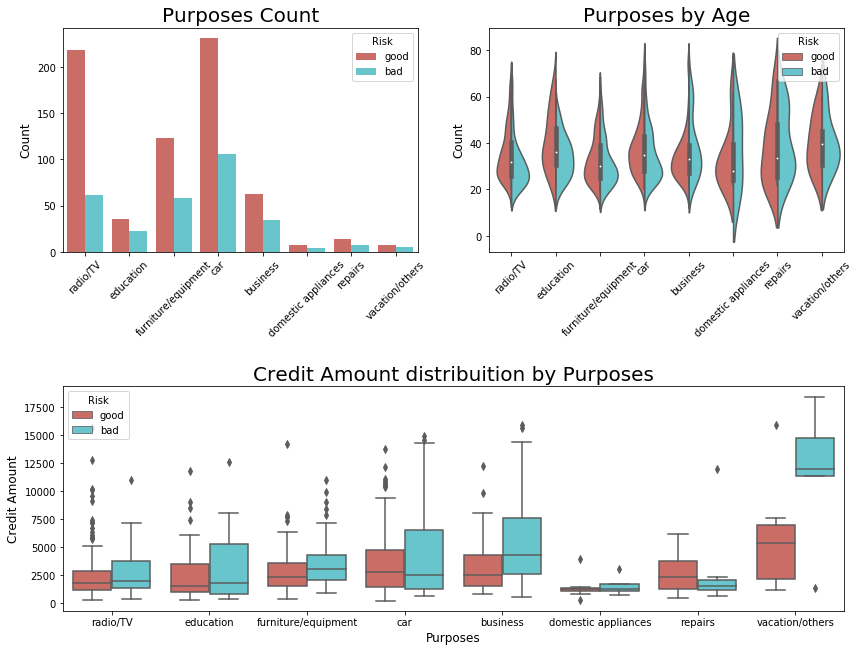

In [20]:
print("Values describe: ")
print(pd.crosstab(df.Purpose, df.Risk))

plt.figure(figsize = (14,12))

plt.subplot(221)
g = sns.countplot(x="Purpose", data=df, 
              palette="hls", hue = "Risk")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=12)
g.set_title("Purposes Count", fontsize=20)

plt.subplot(222)
g1 = sns.violinplot(x="Purpose", y="Age", data=df, 
                    palette="hls", hue = "Risk",split=True)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
g1.set_xlabel("", fontsize=12)
g1.set_ylabel("Count", fontsize=12)
g1.set_title("Purposes by Age", fontsize=20)

plt.subplot(212)
g2 = sns.boxplot(x="Purpose", y="Credit amount", data=df, 
               palette="hls", hue = "Risk")
g2.set_xlabel("Purposes", fontsize=12)
g2.set_ylabel("Credit Amount", fontsize=12)
g2.set_title("Credit Amount distribuition by Purposes", fontsize=20)

plt.subplots_adjust(hspace = 0.6, top = 0.8)

plt.show()

Duration of the loans distribuition and density.

we can see that the highest duration have the high amounts.
The highest density is between __[12 ~ 18 ~ 24] months__

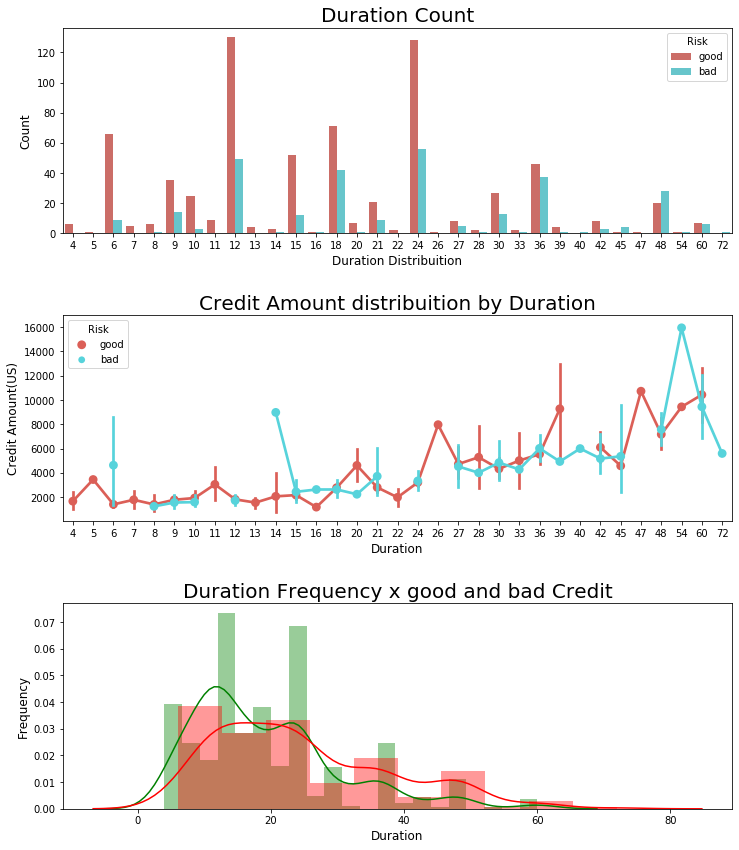

In [21]:
plt.figure(figsize = (12,14))

g= plt.subplot(311)
g = sns.countplot(x="Duration", data=df, 
              palette="hls",  hue = "Risk")
g.set_xlabel("Duration Distribuition", fontsize=12)
g.set_ylabel("Count", fontsize=12)
g.set_title("Duration Count", fontsize=20)

g1 = plt.subplot(312)
g1 = sns.pointplot(x="Duration", y ="Credit amount",data=df,
                   hue="Risk", palette="hls")
g1.set_xlabel("Duration", fontsize=12)
g1.set_ylabel("Credit Amount(US)", fontsize=12)
g1.set_title("Credit Amount distribuition by Duration", fontsize=20)

g2 = plt.subplot(313)
g2 = sns.distplot(df_good["Duration"], color='g')
g2 = sns.distplot(df_bad["Duration"], color='r')
g2.set_xlabel("Duration", fontsize=12)
g2.set_ylabel("Frequency", fontsize=12)
g2.set_title("Duration Frequency x good and bad Credit", fontsize=20)

plt.subplots_adjust(wspace = 0.4, hspace = 0.4,top = 0.9)

plt.show()

## 2.7 Risk vs Checking Account
- in DM - Deutsch Mark

First, let's look the distribuition

In [22]:
#First plot
trace0 = go.Bar(
    x = df[df["Risk"]== 'good']["Checking account"].value_counts().index.values,
    y = df[df["Risk"]== 'good']["Checking account"].value_counts().values,
    name='Good credit Distribuition' 
    
)

#Second plot
trace1 = go.Bar(
    x = df[df["Risk"]== 'bad']["Checking account"].value_counts().index.values,
    y = df[df["Risk"]== 'bad']["Checking account"].value_counts().values,
    name="Bad Credit Distribuition"
)

data = [trace0, trace1]

layout = go.Layout(
    title='Checking accounts Distribuition',
    xaxis=dict(title='Checking accounts name'),
    yaxis=dict(title='Count'),
    barmode='group'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename = 'Age-ba', validate = False)

Now, we will verify the values through Checking Accounts


In [23]:
df_good = df[df["Risk"] == 'good']
df_bad = df[df["Risk"] == 'bad']

trace0 = go.Box(
    y=df_good["Credit amount"],
    x=df_good["Checking account"],
    name='Good credit',
    marker=dict(
        color='#3D9970'
    )
)

trace1 = go.Box(
    y=df_bad['Credit amount'],
    x=df_bad['Checking account'],
    name='Bad credit',
    marker=dict(
        color='#FF4136'
    )
)
    
data = [trace0, trace1]

layout = go.Layout(
    yaxis=dict(
        title='Cheking distribuition'
    ),
    boxmode='group'
)
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='box-age-cat')

Crosstab session and anothers to explore our data by another metrics a little deep

In [24]:
print(pd.crosstab(df.Sex, df.Job))

Job      0    1    2    3
Sex                      
female  12   64  197   37
male    10  136  433  111


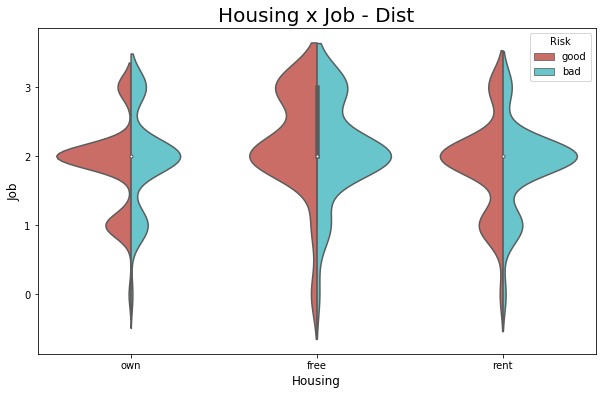

In [25]:
plt.figure(figsize = (10,6))

g = sns.violinplot(x="Housing",y="Job",data=df,
                   hue="Risk", palette="hls",split=True)
g.set_xlabel("Housing", fontsize=12)
g.set_ylabel("Job", fontsize=12)
g.set_title("Housing x Job - Dist", fontsize=20)

plt.show()

In [26]:
print(pd.crosstab(df["Checking account"],df.Sex))

Sex               female  male
Checking account              
little                88   186
moderate              86   183
rich                  20    43


In [27]:
date_int = ["Purpose", 'Sex']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df[date_int[0]], df[date_int[1]]).style.background_gradient(cmap = cm)

Sex,female,male
Purpose,,
business,19,78
car,94,243
domestic appliances,6,6
education,24,35
furniture/equipment,74,107
radio/TV,85,195
repairs,5,17
vacation/others,3,9


In [28]:
date_int = ["Purpose", 'Sex']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df[date_int[0]], df[date_int[1]]).style.background_gradient(cmap = cm)

Sex,female,male
Purpose,,
business,19,78
car,94,243
domestic appliances,6,6
education,24,35
furniture/equipment,74,107
radio/TV,85,195
repairs,5,17
vacation/others,3,9


## 2.8 Looking the total of values in each categorical feature

In [29]:
print("Purpose : ",df.Purpose.unique())
print("Sex : ",df.Sex.unique())
print("Housing : ",df.Housing.unique())
print("Saving accounts : ",df['Saving accounts'].unique())
print("Risk : ",df['Risk'].unique())
print("Checking account : ",df['Checking account'].unique())
print("Age Bucket : ",df['Age Bucket'].unique())

Purpose :  ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']
Sex :  ['male' 'female']
Housing :  ['own' 'free' 'rent']
Saving accounts :  [nan 'little' 'quite rich' 'rich' 'moderate']
Risk :  ['good' 'bad']
Checking account :  ['little' 'moderate' nan 'rich']
Age Bucket :  [Senior, Student, Adult, Young]
Categories (4, object): [Student < Young < Adult < Senior]


***


# 3. Feature Quality Engineering


In [30]:
# Purpose
df['Purpose'].replace(['radio/TV', 'education', 'furniture/equipment', 'car', 'business',
 'domestic appliances', 'repairs', 'vacation/others'], [0, 1, 2, 3, 4, 5, 6, 7], inplace=True)

# Sex
df['Sex'].replace(['male','female'], [0, 1], inplace=True)

# Housing
df['Housing'].replace(['own', 'free', 'rent'], [0, 1, 2], inplace=True)

# Saving accounts
df['Saving accounts'] = df['Saving accounts'].fillna('empty')
df['Saving accounts'].replace(['empty', 'little', 'moderate', 'quite rich', 'rich', ], [0, 1, 2, 3, 4], inplace=True)

# Checking accounts
df['Checking account'] = df['Checking account'].fillna('empty')
df['Checking account'].replace(['empty', 'little', 'moderate', 'rich', ], [0, 1, 2, 3], inplace=True)

# Age Bucket
df['Age Bucket'].replace(['Student','Young', 'Adult', 'Senior'], [0, 1, 2, 3], inplace=True)

# Risk
df['Risk'].replace(['good','bad'], [0, 1], inplace=True)


print(df.head())

   Age  Sex  Job  Housing  Saving accounts  Checking account  Credit amount  \
0   67    0    2        0                0                 1           1169   
1   22    1    2        0                1                 2           5951   
2   49    0    1        0                1                 0           2096   
3   45    0    2        1                1                 1           7882   
4   53    0    2        1                1                 1           4870   

   Duration  Purpose  Risk  Age Bucket  
0         6        0     0           3  
1        48        0     1           0  
2        12        1     0           2  
3        42        2     0           2  
4        24        3     1           2  


In [31]:
del df["Age"]
print(df.describe())

               Sex          Job      Housing  Saving accounts  \
count  1000.000000  1000.000000  1000.000000      1000.000000   
mean      0.310000     1.904000     0.466000         1.190000   
std       0.462725     0.653614     0.779392         0.966869   
min       0.000000     0.000000     0.000000         0.000000   
25%       0.000000     2.000000     0.000000         1.000000   
50%       0.000000     2.000000     0.000000         1.000000   
75%       1.000000     2.000000     1.000000         1.000000   
max       1.000000     3.000000     2.000000         4.000000   

       Checking account  Credit amount     Duration      Purpose         Risk  \
count       1000.000000    1000.000000  1000.000000  1000.000000  1000.000000   
mean           1.001000    3271.258000    20.903000     2.096000     0.300000   
std            0.957034    2822.736876    12.058814     1.630166     0.458487   
min            0.000000     250.000000     4.000000     0.000000     0.000000   
25%      

# 4. Correlation
Looking the correlation of the data

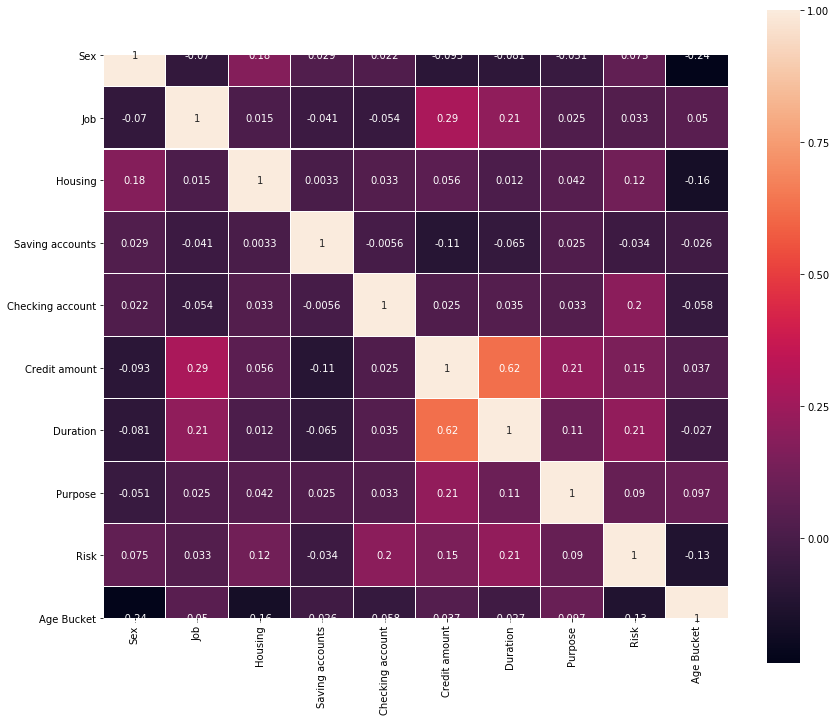

In [32]:
plt.figure(figsize=(14,12))
sns.heatmap(df.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True,  linecolor='white', annot=True)
plt.show()

# 5. Preprocessing
* Importing ML librarys
* Setting X and y variables to the prediction
* Splitting Data

In [33]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score # to split the data
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score #To evaluate our model

from sklearn.model_selection import GridSearchCV

# Algorithmns models to be compared
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [34]:
df['Credit amount'] = np.log(df['Credit amount'])

In [35]:
#Creating the X and y variables
X = df.drop('Risk', 1)
y = df["Risk"]

# Spliting X and y into train and test version
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

X_train.to_csv("train_data.csv", index=False)

X_train.head()

,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Age Bucket
82,1,1,2,2,0,7.357556,18,4,0
991,0,1,0,2,0,7.358194,15,0,1
789,0,2,0,1,1,8.699181,40,1,1
894,0,2,0,0,0,7.063904,18,0,1
398,0,2,2,1,2,7.109062,12,3,2


## 5.1 Training (Model Cross Validation)

LR: 0.240537 (0.089244)
LDA: 0.239090 (0.080803)
KNN: 0.375385 (0.104998)
CART: 0.479549 (0.118818)
NB: 0.420657 (0.074241)
RF: 0.360203 (0.108498)
SVM: 0.246769 (0.090427)


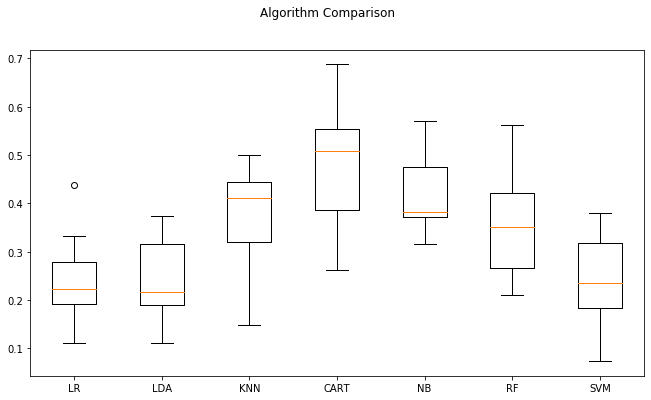

In [36]:
# to feed the random state
seed = 2019

# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC(gamma='auto')))

# evaluate each model in turn
results = []
names = []
scoring = 'recall'

for name, model in models:
        kfold = KFold(n_splits=10, random_state=seed)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
# boxplot algorithm comparison
fig = plt.figure(figsize=(11,6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# 6. Model Training

## 6.1 Hyper Parameter tuning

The best tuning parameter:
* use in 6.2 for training
* may skip 6.1

```
0.5174383252818036
{'max_depth': None, 'max_features':8, 'n_estimators': 3}
```

In [37]:
#Seting the Hyper Parameters
param_grid = {"max_depth": [3,5,7,10,None],
              "n_estimators":[3,5,10,25,50],
              "max_features": [4,6,8,9]}

#Creating the classifier
clf = RandomForestClassifier(random_state=2)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

In [ ]:
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5, scoring='recall', verbose=4)
grid_search.fit(X_train, y_train)

In [ ]:
print(grid_search.best_score_)
print(grid_search.best_params_)

## 6.2 ML training and save model

In [ ]:
import pickle

clf = RandomForestClassifier(max_depth=None, max_features=8, n_estimators=3, random_state=2)
clf.fit(X_train, y_train)

pkl = open('model.pkl', 'wb')
pickle.dump(clf, pkl)

with open('func.pkl', 'wb') as func_pkl:
    pickle.dump(clf.predict_proba,func_pkl)
    
clf = None

## 6.3 ML load model and evaluation

In [ ]:
model_pkl = open('model.pkl', 'rb')
model = pickle.load(model_pkl)

accuracy = round(model.score(X_train, y_train) * 100, 2)
print("Model Accuracy: ", accuracy)


## 6.4 ML Inference (test set) and save result

In [ ]:
y_conf = model.predict_proba(X_test)
np.savetxt("y_conf.csv", y_conf, delimiter=",")
np.savetxt("y_true.csv", y_test, delimiter=",")

***


# 7. Explainability with XAI

In [ ]:
import os
import sys
from pprint import pprint
sys.path.append('../../../')
from xai.compiler.base import Configuration, Controller

## With Simple three steps

### I - Specify config file

In [ ]:
json_config = 'basic-report-explainable.json'

### II - Initial compiler

In [ ]:
controller = Controller(config=Configuration(json_config))
pprint(controller.config)

### III - Render report

In [ ]:
controller.render()

## Result

### I -  Explainability Report

In [ ]:
print("report generated : %s/german-credit-risk-report.pdf" % os.getcwd())

### II - Explainability Pickle

In [ ]:
print("explainer generated : %s/explainer.pkl" % os.getcwd())

### III - Inference Explainer

In [ ]:
import xai
from xai.explainer.explainer_factory import ExplainerFactory
from pprint import pprint

explainer = ExplainerFactory.get_explainer(domain=xai.DOMAIN.TABULAR, algorithm=xai.ALG.LIME)
explainer.load_explainer('explainer.pkl')
explanations = explainer.explain_instance(instance=X_test.values[0,:],num_features=5)
pprint(explanations)